In [128]:
import pyulog
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [20, 10]

In [160]:
data_silv_r = pyulog.ULog("data/mereni_silvestr2021/silvestr_ref.ulg")
data_silv_m = pyulog.ULog("data/mereni_silvestr2021/silvestr.ulg")

data_silv_r = pyulog.ULog("data/mereni_silvestr2021/novorocni_ohnostroj_ref.ulg")
data_silv_m = pyulog.ULog("data/mereni_silvestr2021/novorocni_ohnostroj_mes.ulg")

In [161]:
#print(set([print(x.name) for x in data_silv_r.data_list]))

In [162]:
def gen_df(data, fields):
    tables = []
    for field in fields:
        pr = field+'/'
        d = pd.DataFrame(data.get_dataset(field).data).set_index('timestamp').sort_index()
        d = d.add_prefix(pr).rename(columns={pr+'timestamp':'timestamp'})
        tables.append(d)
    
    return pd.concat(tables, sort=True).sort_index().interpolate(method="linear")

mes = gen_df(data_silv_m, ['sensor_airborne_particles', 'vehicle_local_position', 'vehicle_global_position', 'wind', 'airspeed'])
ref = gen_df(data_silv_r, ['sensor_airborne_particles', 'vehicle_local_position', 'vehicle_global_position', 'wind', 'airspeed'])


for ds in [mes, ref]:
    ds['vehicle_local_position/z'] *= -1
    ds['wind_spd'] = np.sqrt(ds['wind/windspeed_north']**2 + ds['wind/windspeed_east']**2)

#mes['vehicle_local_position/z'] *= -1
#ref['vehicle_local_position/z'] *= -1


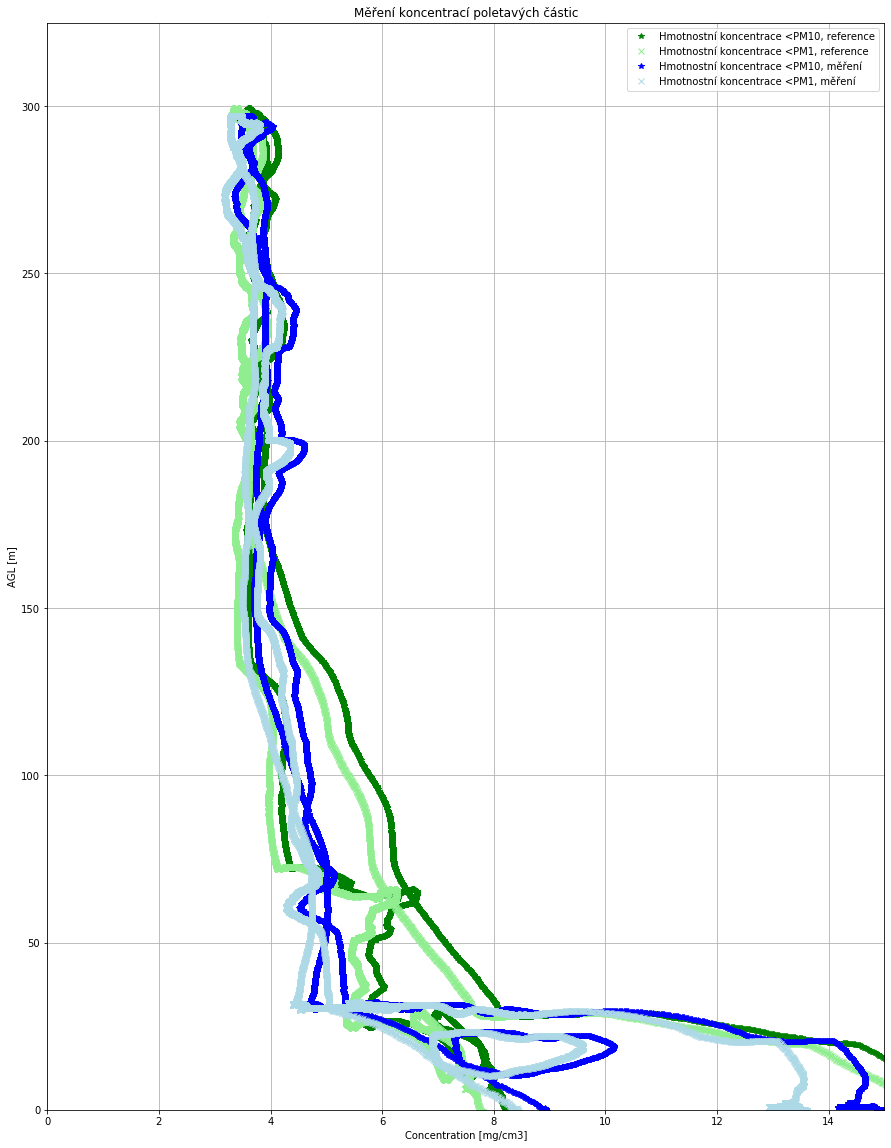

In [166]:
plt.figure(figsize=(15, 20))

# plt.plot(ref['wind_spd'], ref['vehicle_local_position/z'], color="green", ls='-', label="Odhad rychlosti větru, reference")
# plt.plot(mes['wind_spd'], mes['vehicle_local_position/z'], color="lightgreen", ls='-', label="Odhad rychlosti větru, měření")

# plt.plot(ref['airspeed/air_temperature_celsius'], ref['vehicle_local_position/z'], color="green", ls='--', label="Teplota vzduchu, reference")
# plt.plot(mes['airspeed/air_temperature_celsius'], mes['vehicle_local_position/z'], color="lightgreen", ls='--', label="Teplota vzduchu, měření")

plt.plot(ref['sensor_airborne_particles/mass_concentration_pm10_0'], ref['vehicle_local_position/z'], color="green", marker="*", ls='', label="Hmotnostní koncentrace <PM10, reference")
plt.plot(ref['sensor_airborne_particles/mass_concentration_pm1_0'], ref['vehicle_local_position/z'], color="lightgreen", marker="x", ls='', label="Hmotnostní koncentrace <PM1, reference")

plt.plot(mes['sensor_airborne_particles/mass_concentration_pm10_0'], mes['vehicle_local_position/z'], color="blue", marker="*", ls='', label="Hmotnostní koncentrace <PM10, měření")
plt.plot(mes['sensor_airborne_particles/mass_concentration_pm1_0'], mes['vehicle_local_position/z'], color="lightblue", marker="x", ls='', label="Hmotnostní koncentrace <PM1, měření")
plt.ylabel("AGL [m]")
plt.xlabel("Concentration [mg/cm3]")
plt.xlim(0,15)
plt.ylim(0, 325)
plt.title("Měření koncentrací poletavých částic")
plt.grid()
plt.legend()

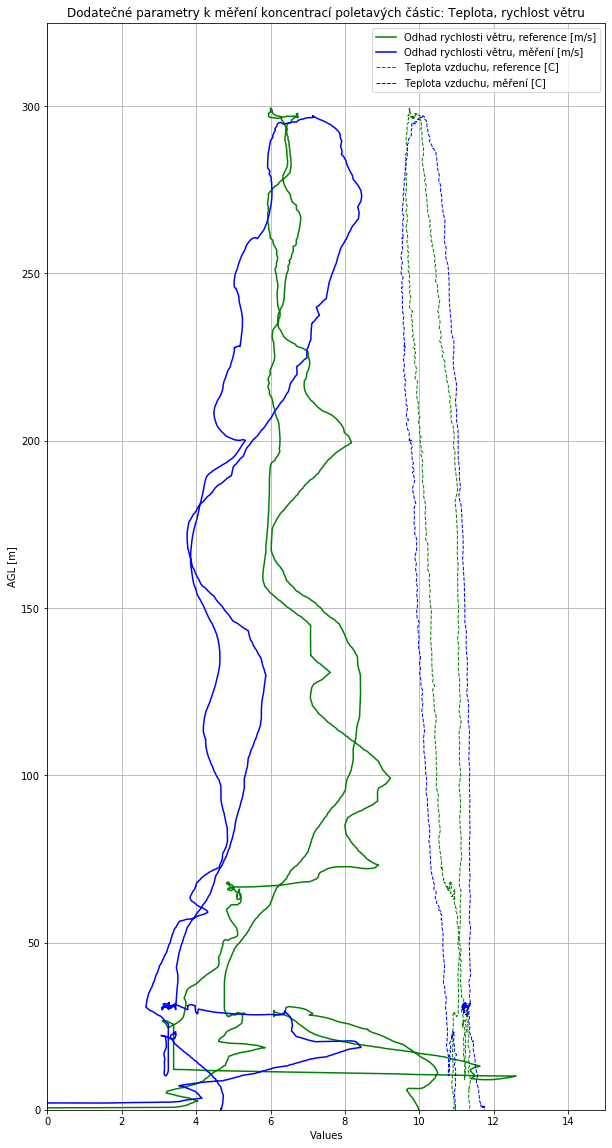

In [167]:
plt.figure(figsize=(10, 20))


plt.plot(ref['wind_spd'], ref['vehicle_local_position/z'], color="green", ls='-', label="Odhad rychlosti větru, reference [m/s]")
plt.plot(mes['wind_spd'], mes['vehicle_local_position/z'], color="blue", ls='-', label="Odhad rychlosti větru, měření [m/s]")

plt.plot(ref['airspeed/air_temperature_celsius'], ref['vehicle_local_position/z'], color="green", ls='--', lw=1, label="Teplota vzduchu, reference [C]")
plt.plot(mes['airspeed/air_temperature_celsius'], mes['vehicle_local_position/z'], color="blue", ls='--', lw=1, label="Teplota vzduchu, měření [C]")


plt.ylabel("AGL [m]")
plt.xlabel("Values")
plt.xlim(0,15)
plt.ylim(0, 325)
plt.title("Dodatečné parametry k měření koncentrací poletavých částic: Teplota, rychlost větru")
plt.grid()
plt.legend()

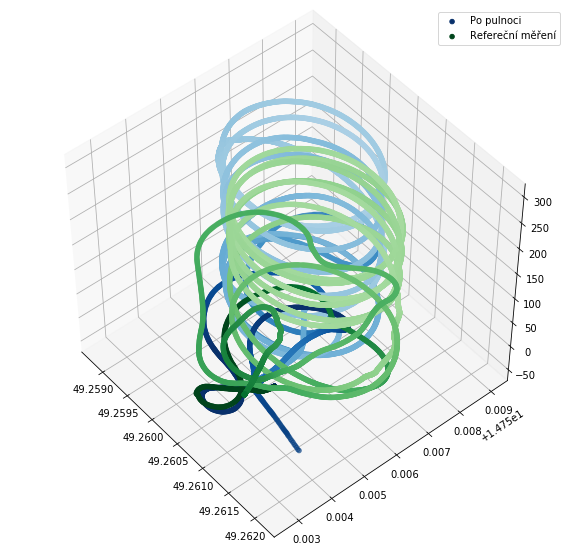

In [165]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(mes['vehicle_global_position/lat'], mes['vehicle_global_position/lon'], mes['vehicle_local_position/z'], c=mes['sensor_airborne_particles/mass_concentration_pm10_0'], cmap='Blues', vmin=0, vmax=10, label="Po pulnoci")
ax.scatter3D(ref['vehicle_global_position/lat'], ref['vehicle_global_position/lon'], ref['vehicle_local_position/z'], c=ref['sensor_airborne_particles/mass_concentration_pm10_0'], cmap='Greens', vmin=0, vmax=10, label="Refereční měření")
ax.view_init(50, -40)
plt.legend()
plt.grid()